In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prior Exploratory Data Analysis

In [2]:
cleaned_all = pd.read_excel("cleaned_all.xlsx")

In [3]:
cleaned_all.isna().sum()

Post ID                                    20838
Sound Bite Text                             2118
Source Type                                    0
Published Date (GMT-04:00) New York            0
Author Location - Country 1               260589
No. of Followers/Daily Unique Visitors         0
Richness                                       0
dtype: int64

In [4]:
cleaned_all.dropna(subset=['Sound Bite Text'], inplace=True)

**we are interested in the number of oberservations per Source Type**

In [5]:
cleaned_all.groupby("Source Type")['Post ID'].count()

Source Type
Blogs                    150093
Comments                   8393
Consumer Reviews          11437
Facebook                   1550
Forums                    38987
Instagram                 45984
Other Social Networks        24
Tumblr                    80893
Twitter                   26334
Name: Post ID, dtype: int64

For better visualization, we plot a bargraph to see the number of observations across post type.

<AxesSubplot:xlabel='Source Type'>

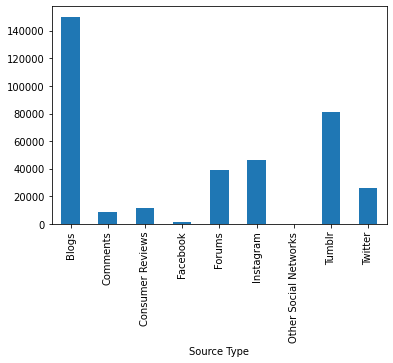

In [6]:
cleaned_all.groupby("Source Type")['Post ID'].count().plot(kind='bar')

**We could obviously observe that most of our sample posts are of type "Blogs", followed by Tumblr and then Instagram**

**We are also interested in the distribution of richness across different post source**

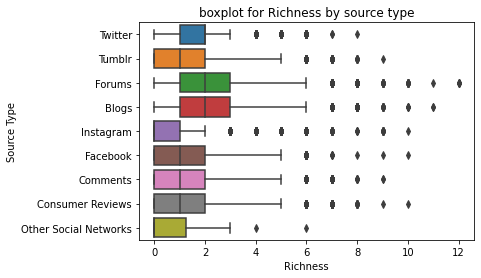

In [7]:
sns.boxplot(x='Richness', y='Source Type',  data=cleaned_all)
color_backup = ['aliceblue','antiquewhite','aqua','aquamarine'] 

plt.title("boxplot for Richness by source type")
plt.show()

**As shown in the boxplot above, Forums and Blogs generally have higher richness compared with other source type. That could be due to the length of 'text', so we would then investigate further regarding this first guess.**

In [8]:
cleaned_all['Sound Bite Text'] = cleaned_all['Sound Bite Text'].astype('string')
cleaned_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384479 entries, 0 to 386595
Data columns (total 7 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Post ID                                 363695 non-null  object
 1   Sound Bite Text                         384479 non-null  string
 2   Source Type                             384479 non-null  object
 3   Published Date (GMT-04:00) New York     384479 non-null  object
 4   Author Location - Country 1             125751 non-null  object
 5   No. of Followers/Daily Unique Visitors  384479 non-null  int64 
 6   Richness                                384479 non-null  int64 
dtypes: int64(2), object(4), string(1)
memory usage: 31.5+ MB


To see the length(number of words) of the 'sound bite text' per post, we add a temporary column

In [9]:
# add temporary column to get the length (number of words) per post
cleaned_all['post_length'] = 0
for i in range(len(cleaned_all)):
    if(isinstance(cleaned_all.iloc[i,1],str)):
        cleaned_all.iloc[i,7] = len(cleaned_all.iloc[i,1].split())

**Then, we would like to see the distribution of length of the post across different source types**

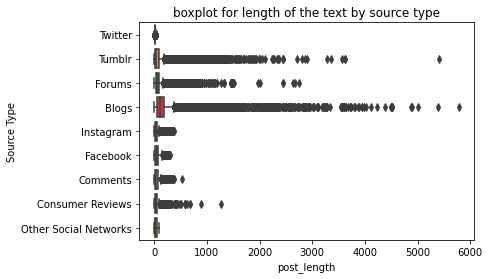

In [10]:
sns.boxplot(x='post_length', y='Source Type',  data=cleaned_all)
plt.title("boxplot for length of the text by source type")
plt.show()

 We could percieve from the boxplot that both the length of blogs and Tumblr have plenty of extermely large outliers, and that confirm our first infer about the distribution of richness.

In [11]:
cleaned_all.groupby("Source Type")['post_length'].max()

Source Type
Blogs                    5781
Comments                  528
Consumer Reviews         1261
Facebook                  298
Forums                   2747
Instagram                 371
Other Social Networks      81
Tumblr                   5415
Twitter                    35
Name: post_length, dtype: int64